# Pandenomics

## The Bruhs' Progress Report

* Aleksandar Kartelyan
* Karan Shah
* Ramzi Rimawi
* Thomas Sobczak
* Ryan Thommes

## Project Introduction
The pandemic has caused inflation across the nation, thus increasing cost in all stages in production of goods. We analyzed different impacts the COVID-19 pandemic has had on the economy and the nation overall. As a group we discovered inflation and increased prices of goods and services affects everyone in the country from workers to businesses to everyday people. So our question is, How has the COVID-19 pandemic caused prices to increase in the US?

$\color{red}{\text{**ADD CHANGES?:**}}$

## Data Cleaning
### Show clearly how you cleaned your data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

data_cols = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','HALF1','HALF2']

data = pd.read_csv("CPI-U.csv", names=data_cols)
data = data.iloc[1: , :]
data.drop(data.iloc[:, 13:15], inplace = True, axis = 1)
data = data.replace(r'^\s*$', np.nan, regex=True)
data.head(4) #rows 1-4 shows years 2000-2003

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0
2,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7
3,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9
4,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3


## Exploratory Data Analysis
The following barplots show a simple comparison of the average CPI per month in pre-covid years and CPI after covid hit in 2020. It is clearly visible that CPI is higher in years after covid. Not only that, it can also be inferred that the CPI has increased as the year goes on, in years after 2020.

## At Least One Visualization

[Text(0.5, 1.0, 'Average CPI per month before COVID')]

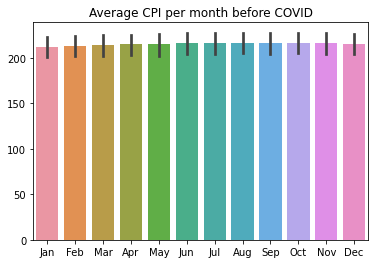

In [9]:
pre_covid_yrs = data[(data['Year'] <= '2019')].astype(float)
covid_yrs = data[(data['Year'] > '2019') & (data['Year'] < '2022')].astype(float)


pre_covid_yrs.drop('Year', axis=1, inplace=True)
covid_yrs.drop('Year', axis=1, inplace=True)


sns.barplot(data = pre_covid_yrs).set(title='Average CPI per month before COVID')


[Text(0.5, 1.0, 'Average CPI per month after COVID')]

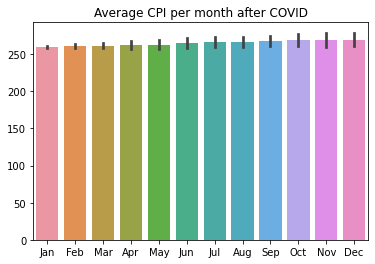

In [10]:
sns.barplot(data = covid_yrs).set(title='Average CPI per month after COVID')

## At Least One ML Analysis

In [11]:
a = []
b = []
c = [2020, 2021, 2023]
data[data['Year'] == '2019'].astype(float).aggregate(func = 'average')
for x in range(2000,2020):
    a.append(float(x))
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    b.append(pd.aggregate(func = 'average'))
a = np.array(a).reshape(-1, 1)
b = np.array(b).reshape(-1, 1)
c = np.array(c).reshape(-1, 1)


linear_regressor = LinearRegression()  # create object for the class

linear_regressor.fit(a, b)  # perform linear regression
Y_pred = linear_regressor.predict(c)  # make predictions
print("Regression Prediction")
print(Y_pred)


pd = data[data['Year'] == '2018'].astype(float)
pd.drop('Year', axis=1, inplace=True)
cpi_2018 = pd.aggregate(func = 'average')
print('Average CPI 2018: ', str(cpi_2018))

pd = data[data['Year'] == '2019'].astype(float)
pd.drop('Year', axis=1, inplace=True)
cpi_2019 = pd.aggregate(func = 'average')
print('Average CPI 2019: ', str(cpi_2019) + "\n")

rate = cpi_2019/cpi_2018

for x in range(2020,2023):
    cpi_2019 = rate * cpi_2019
    print("Baseline Prediction for " + str(x) + ": " + str(cpi_2019))


print()    
    
for x in range(2020,2022):
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    print("Average CPI for " + str(x) + ": " + str(pd.aggregate(func = 'average')))
    
    
print("Average CPI for 2022 so far: " + str((281.148 + 283.716) / 2))

Regression Prediction
[[261.28870044]
 [265.66267945]
 [274.41063747]]
Average CPI 2018:  251.10683333333338
Average CPI 2019:  255.65741666666668

Baseline Prediction for 2020: 260.29046612964976
Baseline Prediction for 2021: 265.00747618179275
Baseline Prediction for 2022: 269.8099683653517

Average CPI for 2020: 258.8111666666667
Average CPI for 2021: 270.96975000000003
Average CPI for 2022 so far: 282.432


## Reflection
### A discussion of the following:
* What is hardest part of the project that you’ve encountered so far?
    - The hardest part so far has been finding patterns in data, because the data doesn't always support the hypothesis we have made before analyzing the data.
* What are your initial insights?
    - The initial insights are that in order to find how covid has impacted the economy for consumers, we might need to find data that is specific to particular industries instead of just the raw CPI
* Are there any concrete results you can show at this point? If not, why not?
    - We have some concrete results but feel that it is not enough to prove our hypothesis.
* Going forward, what are the current biggest problems you’re facing?
    - Some big problems we are facing are finding the right data to support our hypothesis. We are stuck between mulitple datasets and are having trouble identifying the right data to use.
* Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - We feel like we are on track with the project. However, we should deidcate more time to finding more result to better support our big idea and question.
* Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?

## Next steps
(What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.)

$\color{red}{\text{**TODO:**}}$